In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
survey_raw_df = pd.read_csv('C:/python/data/survey_results_public.csv',index_col = 'ResponseId')
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [6]:
schema_raw = pd.read_csv('C:/python/data/survey_results_schema.csv',index_col ='qname')['question']
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [7]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [8]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [9]:
schema_raw['CompTotal']  # CompTotal 항목에 대한 질문이 궁금하면 이렇게 조회

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [133]:
schema_raw['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [134]:
survey_raw_df.info()  # 총 78개의 column이 존재(확인가능. column이 많으면 가시성을 위해 일부 생략)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [135]:
# 표현되는 column과 row의 범위를 변경한다/ 생략되는 column이 없도록 설정
pd.set_option('display.max_columns',78)    #표현되는 column의 최대 개수
pd.set_option('display.max_rows',78)       #표현되는 rows의 최대 개수

In [136]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [137]:
# column에 배열 인덱싱을 함. -> copy() : 얻은 결과를 survey_raw_df로부터 분리 작업하기 위해 복사
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [138]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [190]:
print(schema_raw['YearsCode'])

Including any education, how many years have you been coding in total?


In [191]:
# 연을 포함하는 수치값과 'Less than 1year' 라는 문자열
survey_df['YearsCode'].value_counts()

10.0    5154
5.0     5139
6.0     4603
4.0     4422
7.0     4198
8.0     4189
3.0     4086
2.0     3326
12.0    2960
15.0    2944
20.0    2641
9.0     2548
14.0    1797
11.0    1795
13.0    1606
25.0    1572
1.0     1551
0.0     1399
16.0    1397
30.0    1322
22.0    1164
18.0    1138
17.0    1066
40.0     772
24.0     743
35.0     739
23.0     641
19.0     557
26.0     487
27.0     482
21.0     478
28.0     422
32.0     365
38.0     284
37.0     275
34.0     239
36.0     235
33.0     229
42.0     213
29.0     207
31.0     169
45.0     166
51.0     165
39.0     159
41.0     141
43.0     115
44.0     103
50.0      68
46.0      57
47.0      42
48.0      40
49.0      35
Name: YearsCode, dtype: int64

해당 column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수를 만들어보자
- series를 인자로 갖는 count_nan함수를 만듬
- 이 함수는 인자로 전달된 series의 NaN 개수를 반환

In [192]:
def count_nan(series):
    return len(series) - series.count()    # series 길이를 빼서 남은게 NaN값

In [193]:
# 
count_nan(survey_df['YearsCode'])  # series 가 될 수 있는 것 ''안에 넣기

2623

- YearsCode의 'Less than 1 year'의 값은 0으로 변경
- 'More than 50 years'의 값은 51로 일괄적 변경
- dtype을 float으로 변경, survey_df['YearsCode']에 적용
- Series 메서드 활용( replace (변경전 값, 변경 후 값, inplace = True)

In [194]:
# replace(변경전 값, 변경후 값,inplace = True)
survey_df['YearsCode'].replace('Less than 1 year',0,inplace = True)
survey_df['YearsCode'].replace('More than 50 years',51,inplace = True)

In [195]:
# dtype변경 후 적용해야 해서 '갱신' 해야한다!
survey_df['YearsCode'] = survey_df['YearsCode'].astype('float')
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71079 non-null  object 
 1   Age                     70257 non-null  object 
 2   Gender                  70161 non-null  object 
 3   EdLevel                 70879 non-null  object 
 4   YearsCode               70645 non-null  float64
 5   YearsCodePro            51431 non-null  float64
 6   LanguageHaveWorkedWith  70292 non-null  object 
 7   LanguageWantToWorkWith  66370 non-null  object 
 8   LearnCodeCoursesCert    29169 non-null  object 
 9   ProfessionalTech        34626 non-null  object 
 10  SOAccount               70880 non-null  object 
 11  Employment              71020 non-null  object 
 12  DevType                 60761 non-null  object 
 13  WorkExp                 36478 non-null  float64
dtypes: float64(3), object(11)
memory usage

In [196]:
print(schema_raw['YearsCodePro'])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [197]:
count_nan(survey_df['YearsCodePro'])

21837

In [198]:
survey_df['YearsCodePro'].value_counts()

3.0     4232
5.0     4026
2.0     3907
4.0     3841
10.0    3305
6.0     3151
7.0     2734
8.0     2627
1.0     2622
0.0     1959
15.0    1810
12.0    1702
9.0     1573
20.0    1463
11.0    1361
14.0    1043
22.0     927
16.0     912
13.0     907
25.0     871
18.0     781
17.0     716
30.0     568
23.0     462
24.0     450
21.0     425
19.0     377
26.0     319
27.0     285
35.0     265
28.0     254
32.0     223
40.0     175
29.0     126
33.0     122
31.0     121
34.0     112
36.0     109
37.0      99
38.0      94
42.0      66
45.0      52
39.0      51
41.0      42
51.0      39
43.0      31
44.0      25
46.0      19
48.0      18
50.0      14
47.0      10
49.0       8
Name: YearsCodePro, dtype: int64

In [199]:
# replace(변경전 값, 변경후 값,inplace = True)
survey_df['YearsCodePro'].replace('Less than 1 year',0,inplace = True)
survey_df['YearsCodePro'].replace('More than 50 years',51,inplace = True)

In [200]:
# dtype변경 후 적용해야 해서 '갱신' 해야한다!
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype('float')
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71079 non-null  object 
 1   Age                     70257 non-null  object 
 2   Gender                  70161 non-null  object 
 3   EdLevel                 70879 non-null  object 
 4   YearsCode               70645 non-null  float64
 5   YearsCodePro            51431 non-null  float64
 6   LanguageHaveWorkedWith  70292 non-null  object 
 7   LanguageWantToWorkWith  66370 non-null  object 
 8   LearnCodeCoursesCert    29169 non-null  object 
 9   ProfessionalTech        34626 non-null  object 
 10  SOAccount               70880 non-null  object 
 11  Employment              71020 non-null  object 
 12  DevType                 60761 non-null  object 
 13  WorkExp                 36478 non-null  float64
dtypes: float64(3), object(11)
memory usage

In [201]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,70645.000000,51431.000000,36478.000000
mean,12.258829,9.917968,10.239816
std,9.955086,8.713931,8.697633
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000



- 수치 자료형으로 변경되면 to_numeric 메서드 사용 가능

In [202]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [203]:
schema_raw['Gender']

'Which of the following describe you, if any? Please check all that apply.'

- 둘 이상의 옵션이 포함된 값을 배제하려면
- --->

In [204]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

### Pandas.Series .str.contains        (';', na = ? -->F or T)
### np.nan 값이 섞인 Series 자료형에 대해 특정 문자값이 포함되었는지 확인 가능

> ### ';' 를 포함하는 row를 NaN값으로 변경 가능
> ### '~' 비트연산자: Series 자료형의 벡터화 연산을 위해 T는 F로 F는 T로 반전 시키는 역할

In [205]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na = False)),np.nan, inplace = True)
survey_df.Gender.unique

<bound method Series.unique of ResponseId
1        NaN
2        NaN
3        Man
4        Man
5        NaN
        ... 
73264    Man
73265    Man
73266    Man
73267    Man
73268    Man
Name: Gender, Length: 73268, dtype: object>

In [270]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [207]:
import matplotlib as mpl

## set_style - 그림의 스타일을 일괄 적용
## font.size - 기본폰트의 크기 적용
## figure.figsize -  기본 figure의 사이즈를 적용
## figure.facecolor - 기본 내 배경 생상을 흰색(#00000000) 으로 적용

In [208]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

## font.family - 기본 폰트 종류 적용

In [209]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name()) 
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen Script'
print(mpl.rcParams['font.family'])

NanumBarunpen
Nanum Pen Script
NanumGothic
['Nanum Pen Script']


## axes.unicode_minus

In [210]:
mpl.rcParams['axes.unicode_minus'] = False

In [212]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

### Country에 대한 유일한 값의 개수 확인. NaN 값은 count에 포함되지 않음

In [235]:
# unique 한 값만 개수확인
survey_df['Country'].nunique()

180

In [237]:
# Country 칼럼 중 상위 15개국 나열(알아서 정렬)
survey_df['Country'].value_counts()[:15]    #[] 대신에 head(15) 써도됨

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

In [238]:
cout_data = survey_df['Country'].value_counts()[:15]

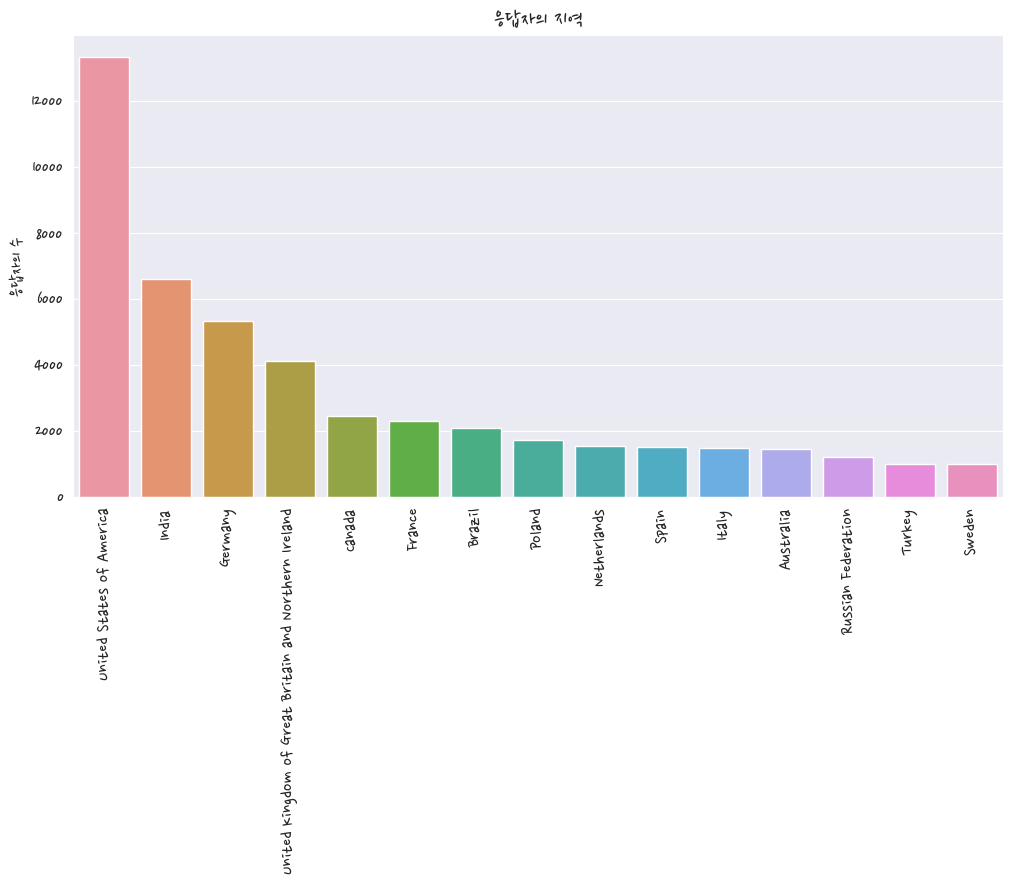

In [251]:
# figure size를 12 x 6으로 설정
plt.figure(figsize=(12,6))
plt.title('응답자의 지역')
sns.barplot(data = survey_df, x = cout_data.index, y = cout_data)
# rotation = 90 은 글자를 반시계 방향으로 90도 회전
plt.xticks(rotation = 90)
plt.ylabel('응답자의 수')
plt.show()

In [252]:
schema_raw['Age']

'What is your age?'

In [253]:
count_nan(survey_df['Age'])

3011

In [254]:
age_counts = survey_df['Age'].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [255]:
survey_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [256]:
survey_df['Age'].nunique()

8

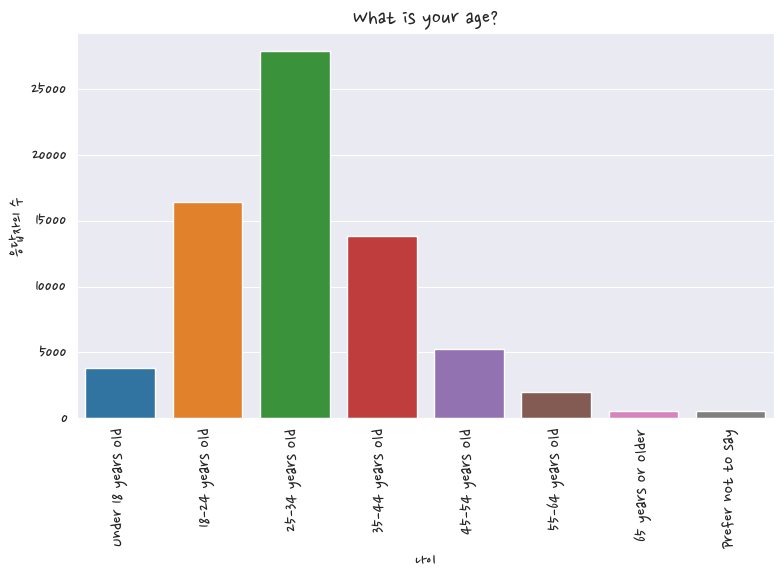

In [257]:

plt.title('What is your age?')
sns.barplot(data = survey_df, x = age_counts.index, y = age_counts,
            order = ['Under 18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older','Prefer not to say'])
# rotation = 90 은 글자를 반시계 방향으로 90도 회전
plt.xticks(rotation = 90)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

In [258]:
age_order = ['Under 18 years old',
             '18-24 years old',
             '25-34 years old',
             '35-44 years old',
             '45-54 years old',
             '55-64 years old',
             '65 years or older',
             'Prefer not to say']

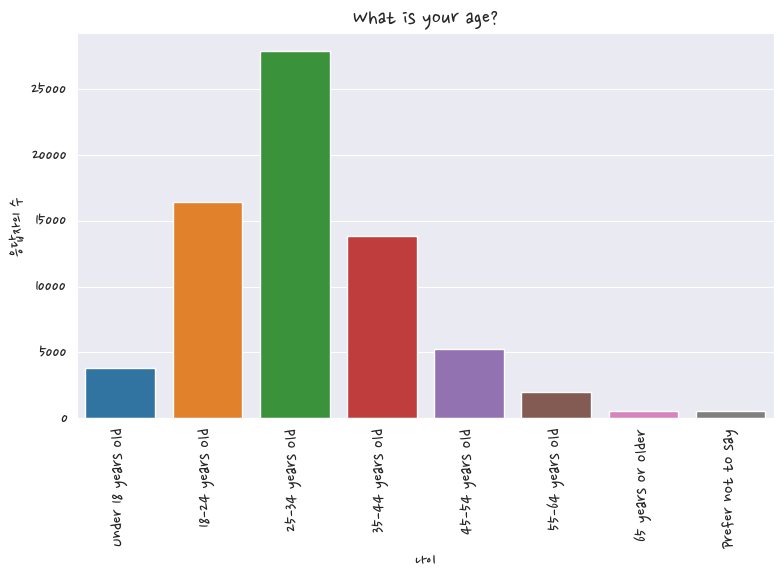

In [259]:
plt.title(schema_raw['Age'])
plt.xticks(rotation = 90)
sns.countplot(data = survey_df, x = 'Age', order = age_order)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

In [282]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na = False)),np.nan, inplace = True)

In [283]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

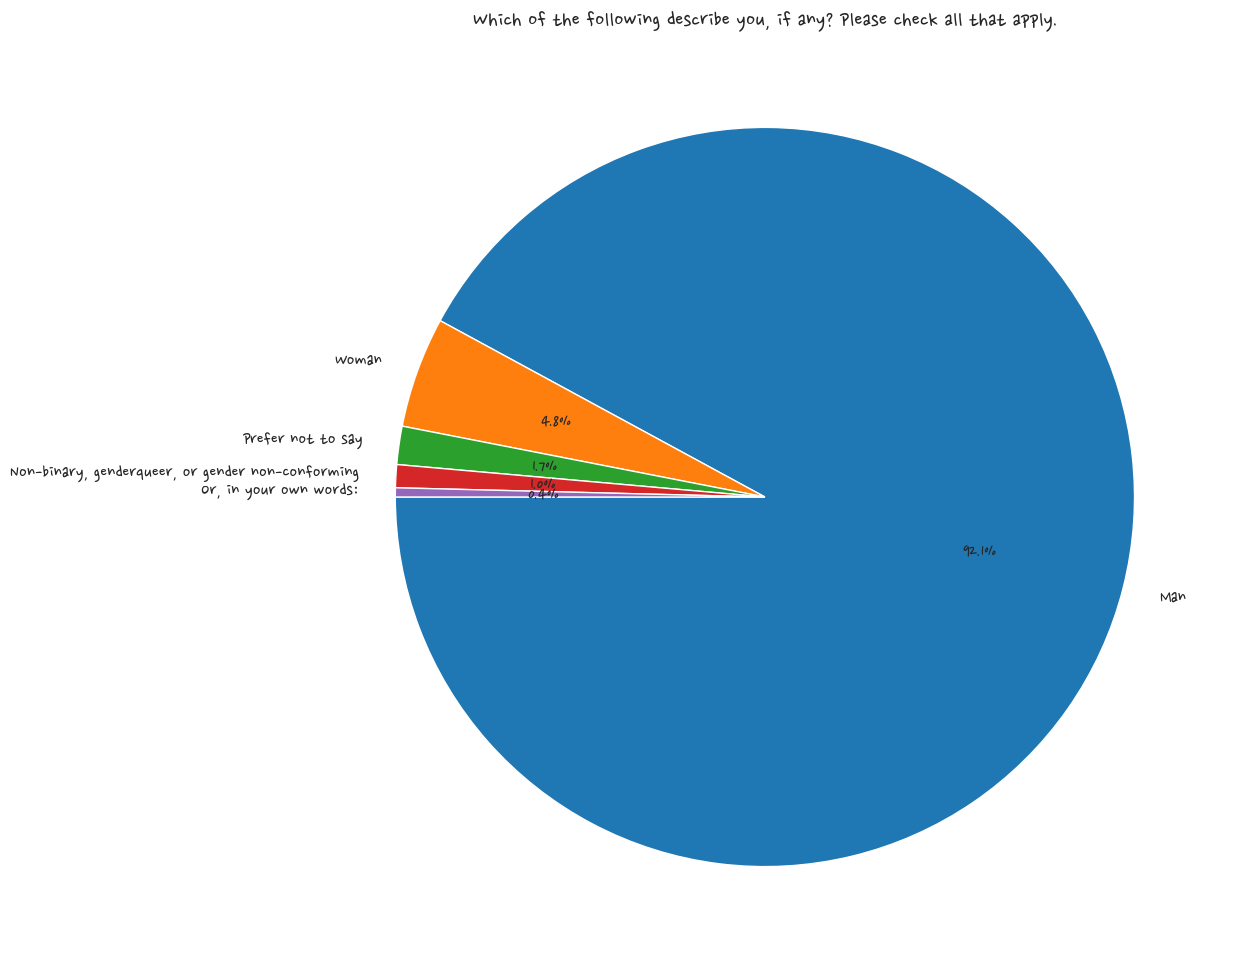

In [290]:
plt.figure(figsize=(14,12))
plt.title(schema_raw['Gender'])
plt.pie(x=survey_df.Gender.value_counts(),labels=[_ for _ in survey_df.Gender.value_counts().index], autopct = "%1.1f%%",startangle = 180)
plt.show()

In [285]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [293]:
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

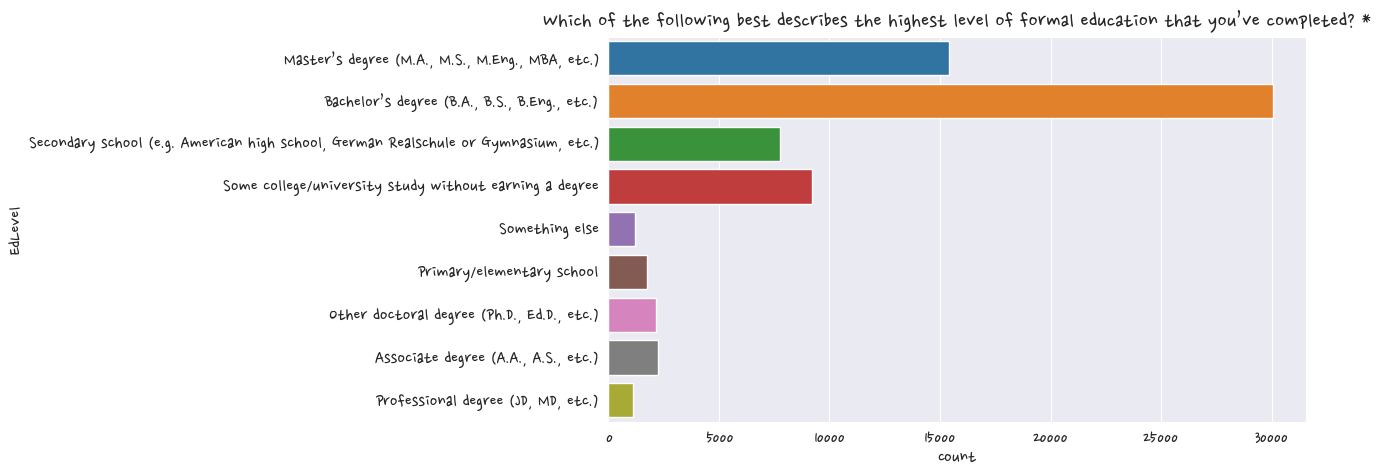

In [314]:
plt.title(schema_raw['EdLevel'])
sns.countplot(data = survey_df, y = 'EdLevel' )
plt.show()

In [316]:
len(survey_df['EdLevel'])

73268

In [310]:
sur_ed = survey_df['EdLevel'].value_counts()/len(survey_df['EdLevel'])*100   # 도표의 값

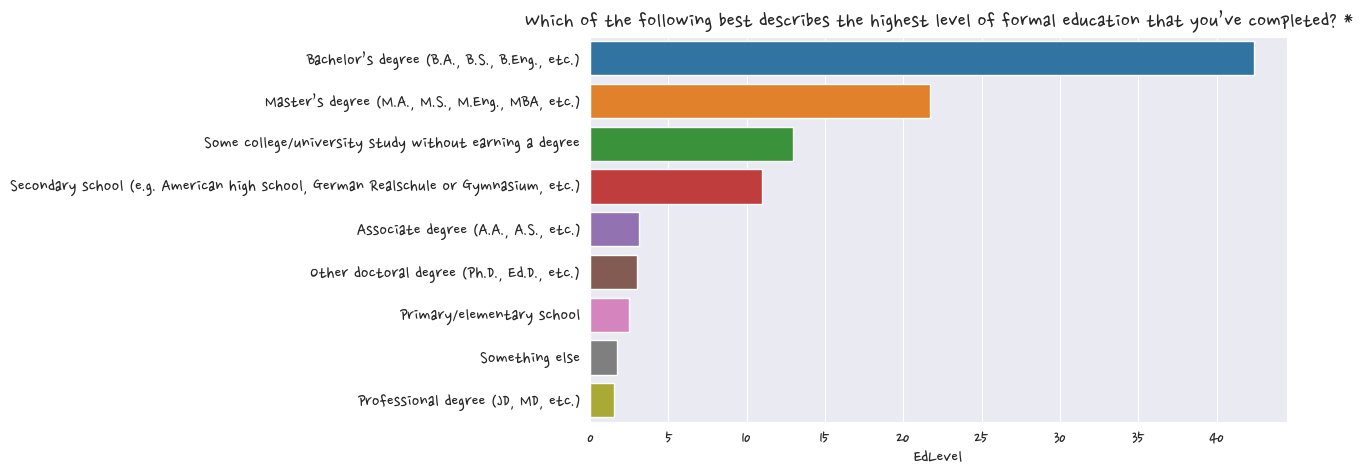

In [319]:
plt.title(schema_raw['EdLevel'])
sns.barplot(data = survey_df, x = sur_ed,y = sur_ed.index)      
plt.show()

In [320]:
sur_ed = survey_df.EdLevel.value_counts(True)*100
sur_ed

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

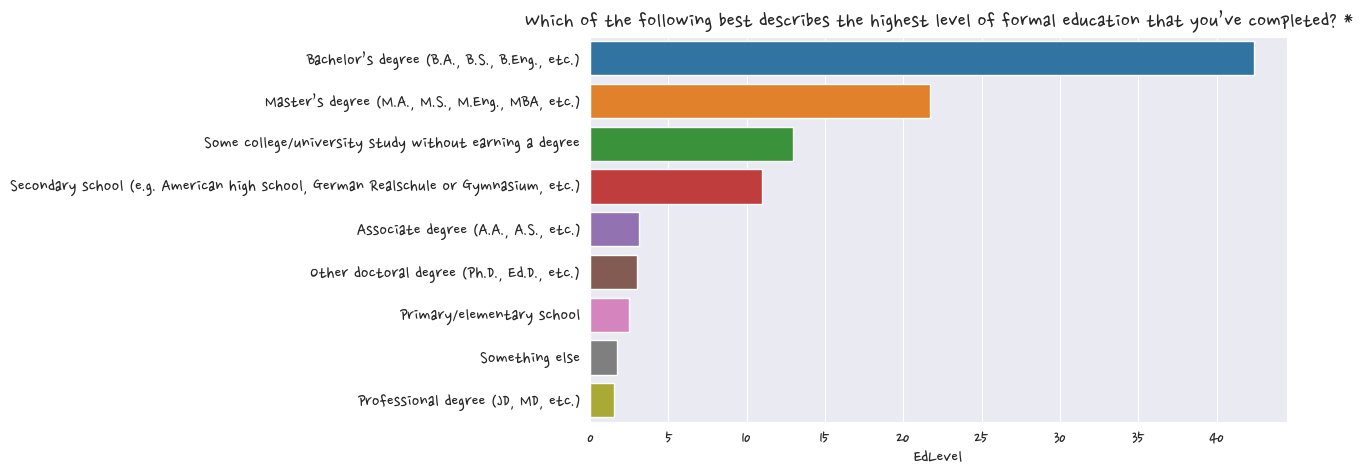

In [321]:
plt.title(schema_raw['EdLevel'])
sns.barplot(x = sur_ed,y = sur_ed.index)      
plt.show()

In [323]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [328]:
sur_employment = survey_df['Employment'].value_counts().head(15)/len(survey_df['Employment'])*100
sur_employment

Employed, full-time                                                         58.202762
Student, full-time                                                           9.094011
Independent contractor, freelancer, or self-employed                         6.743735
Employed, full-time;Independent contractor, freelancer, or self-employed     4.716930
Not employed, but looking for work                                           2.470383
Student, full-time;Employed, part-time                                       1.566850
Employed, part-time                                                          1.523175
Student, part-time                                                           1.413987
Employed, full-time;Student, full-time                                       1.311623
Employed, full-time;Student, part-time                                       1.272042
Student, part-time;Employed, part-time                                       0.978599
Student, full-time;Not employed, but looking for work 

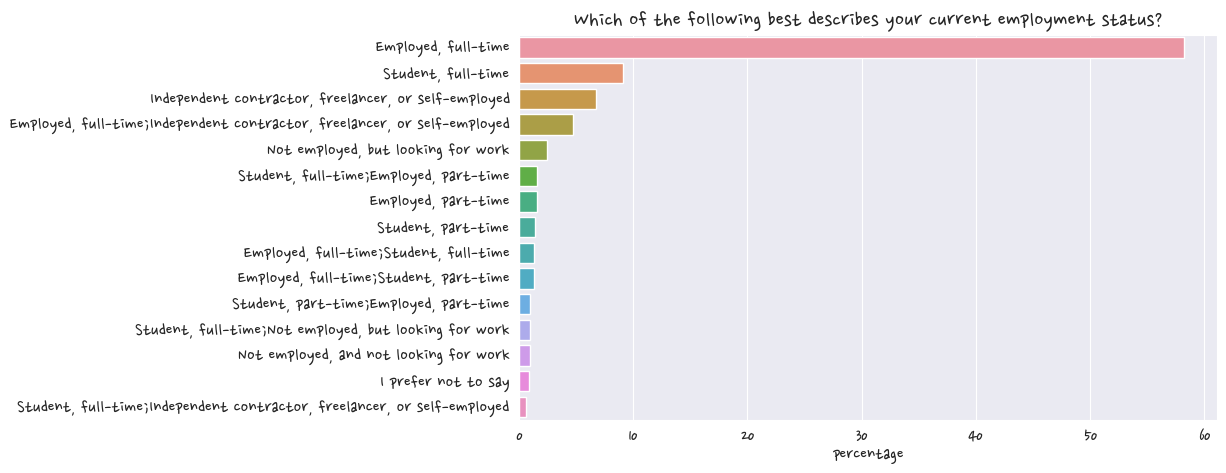

In [337]:
plt.title(schema_raw['Employment'])
sns.barplot(x = sur_employment, y = sur_employment.index)
plt.xlabel('percentage')
plt.show()